In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### This is our dataset of Customer Churn Prediction.

In [2]:
# importing data
data = pd.read_csv('churn_prediction.csv')

In [3]:
# First look
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03


In [4]:
#shape of the data
data.shape

(28382, 21)

In [5]:
#columns of data
data.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'last_transaction'],
      dtype='object')

### Identificaiton of Data types 

In [6]:
#different data types
data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
last_transaction                   object
dtype: object

In [7]:
data['last_transaction'] = pd.to_datetime(data['last_transaction'])

In [8]:
# extracting new columns from "last_transaction"

# last day of year when transaction was done
data['doy_ls_tran'] = data.last_transaction.dt.dayofyear

# week of year when last transaction was done
data['woy_ls_tran'] = data.last_transaction.dt.isocalendar().week

# month of year when last transaction was done
data['moy_ls_tran'] = data.last_transaction.dt.month

# day of week when last transaction was done
data['dow_ls_tran'] = data.last_transaction.dt.dayofweek

In [9]:
data = data.drop(columns = ['last_transaction'])
data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
doy_ls_tran                       float64
woy_ls_tran                        UInt32
moy_ls_tran                       float64
dow_ls_tran                       

### Mean Value

In [12]:
#mean of age
print(data['age'].mean())

#mean of age who are likely to churn
print(data.groupby('churn').age.mean())

48.208336269466564
churn
0    48.378298
1    47.461217
Name: age, dtype: float64


The __mean value of Age of Customers__ and the __mean value of Age of Customers who are likely to churn__ is around 48

In [14]:
#current balance mean
print(data['current_balance'].mean())

#current balance of customers who are likely to churn
print(data.groupby('churn')['current_balance'].mean())

7380.551803607912
churn
0    7871.852338
1    5220.884321
Name: current_balance, dtype: float64


*  The __mean value of current balance of Customers___  is __7380.55180360792__ 
*  The __mean value of Current Balance of Customers__ who are likely to churn is __5220.884321292776__.

### Median

In [15]:
#median of age
data['age'].median()

46.0

*  __Median__ of age is 46. 
* That means 46 is the __50th percentile__ of the age of customers.

### Standard Deviation and Variance

In [16]:
print(data['current_balance'].std())
print(data['current_balance'].var())

42598.71192323329
1814650257.5186183


*  __standard deviation__  for current balance of the customers is \$42598.7
*  __variance__ for current balance of the customers is 1814650257.5186107

### Describe Function

describe() function is used to view some basic __descriptive statistical details__ like __percentile, mean, std etc.__ of a data frame.

In [18]:
data.describe(include=["int64", "float64"])

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,...,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,doy_ls_tran,moy_ls_tran,dow_ls_tran
count,28382.000000,28382.000000,28382.000000,25919.000000,27579.000000,28382.000000,28382.000000,2.838200e+04,2.838200e+04,2.838200e+04,...,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000,25159.000000,25159.000000,25159.000000
mean,15143.508667,2091.144105,48.208336,0.347236,796.109576,2.225530,925.975019,7.380552e+03,7.495771e+03,7.496780e+03,...,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329,295.045709,10.142255,3.042728
std,8746.454456,272.676775,17.807163,0.997661,432.872102,0.660443,937.799129,4.259871e+04,4.252935e+04,4.172622e+04,...,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571,86.284356,2.788671,1.712724
min,1.000000,73.000000,1.000000,0.000000,0.000000,1.000000,1.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,...,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000,1.000000,1.000000,0.000000
25%,7557.250000,1958.000000,36.000000,0.000000,409.000000,2.000000,176.000000,1.784470e+03,1.906000e+03,2.180945e+03,...,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,0.000000,270.000000,9.000000,1.000000
50%,15150.500000,2154.000000,46.000000,0.000000,834.000000,2.000000,572.000000,3.281255e+03,3.379915e+03,3.542865e+03,...,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000,335.000000,12.000000,3.000000
75%,22706.750000,2292.000000,60.000000,0.000000,1096.000000,3.000000,1440.000000,6.635820e+03,6.656535e+03,6.666887e+03,...,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000,354.000000,12.000000,5.000000
max,30301.000000,2476.000000,90.000000,52.000000,1649.000000,3.000000,4782.000000,5.905904e+06,5.740439e+06,5.700290e+06,...,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000,365.000000,12.000000,6.000000


* count represents total number of data points.
* mean represents average value
* std represents standard deviation
* min represents the minimum value of the column
* 25% represents 25th percentile that means 25% data fall below this value.
* 50% represents 50th percentile that means 50% data fall below this value. This is __Median__
* 75% represents the 75th percentile here
* max represents the maximum value of the column

In [52]:
churn_age = data[data['churn'] == 1]['age']

In [42]:
data.mode(axis = 1, dropna = True, numeric_only = True)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1458.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.00,0.56,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.00,0.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.47,2291.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,0.30,1076.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28378,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28379,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28380,0.20,1625.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


A __Histogram__ visualises the distribution of data over a continuous interval. 
Each bar in a histogram represents the tabulated __frequency__ at each __interval/bin__. 
In simple words height represents the frequency for respective bin (interval)

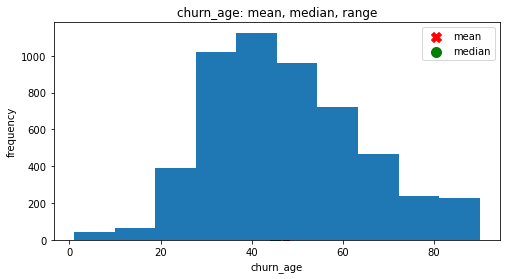

In [53]:
# setting image resolution
plt.figure(figsize = (8,4))

# Plotting histogram and descriptive summary
plt.hist(churn_age,bins=10)
plt.scatter(churn_age.mean(), 0, label = 'mean', color = 'red', marker="X", s = 100)
plt.scatter(churn_age.median(), 0, label = 'median', color = 'green', s = 100)


# axes labels
plt.xlabel('churn_age')
plt.ylabel('frequency')
plt.title('churn_age: mean, median, range')
plt.legend()

* Mean Value is higher than the Median Value
* The peak occurs at the interval (36,45) that means highest number of customers age lie in this interval
* Most customer age between 30 and 65
